In [81]:
import pandas as pd

df=pd.read_csv("ecommerce_sample_data.csv")

df.head(7)

,Order_ID,Order_Date,Customer_ID,Product_Category,Product_Name,Quantity,Price_per_Unit,Discount,City,Payment_Method
0,101,01-07-2025,1001,Electronics,Smartphone,1,15000,0.10,Chennai,UPI
1,102,02-07-2025,1002,Clothing,T-Shirt,2,500,0.05,Mumbai,Credit Card
2,103,03-07-2025,1003,Groceries,Rice Bag,5,600,0.00,Delhi,Cash
3,104,03-07-2025,1001,Electronics,Bluetooth Speaker,1,2500,0.15,Chennai,UPI
4,105,04-07-2025,1004,Books,Novel,3,300,0.10,Bangalore,Net Banking
5,106,04-07-2025,1005,Electronics,Laptop,1,40000,0.20,Salem,Cash
6,107,05-07-2025,1006,Groceries,Sugar,1,100,0.00,Noida,UPI


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          7 non-null      int64  
 1   Order_Date        7 non-null      object 
 2   Customer_ID       7 non-null      int64  
 3   Product_Category  7 non-null      object 
 4   Product_Name      7 non-null      object 
 5   Quantity          7 non-null      int64  
 6   Price_per_Unit    7 non-null      int64  
 7   Discount          7 non-null      float64
 8   City              7 non-null      object 
 9   Payment_Method    7 non-null      object 
dtypes: float64(1), int64(4), object(5)
memory usage: 692.0+ bytes


In [83]:
df.describe()

,Order_ID,Customer_ID,Quantity,Price_per_Unit,Discount
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,104.000000,1003.142857,2.000000,8428.571429,0.085714
std,2.160247,1.951800,1.527525,14914.614118,0.074801
min,101.000000,1001.000000,1.000000,100.000000,0.000000
25%,102.500000,1001.500000,1.000000,400.000000,0.025000
50%,104.000000,1003.000000,1.000000,600.000000,0.100000
75%,105.500000,1004.500000,2.500000,8750.000000,0.125000
max,107.000000,1006.000000,5.000000,40000.000000,0.200000


In [84]:
df.isnull().sum()

Order_ID            0
Order_Date          0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Price_per_Unit      0
Discount            0
City                0
Payment_Method      0
dtype: int64

In [85]:
df_1=df.copy()

In [86]:
df_1["Quantity"].sum()
df_1["Total_value"]= df_1["Quantity"]* df_1["Price_per_Unit"]*(1-df_1["Discount"]/100)
df_1.head(7)

,Order_ID,Order_Date,Customer_ID,Product_Category,Product_Name,Quantity,Price_per_Unit,Discount,City,Payment_Method,Total_value
0,101,01-07-2025,1001,Electronics,Smartphone,1,15000,0.10,Chennai,UPI,14985.00
1,102,02-07-2025,1002,Clothing,T-Shirt,2,500,0.05,Mumbai,Credit Card,999.50
2,103,03-07-2025,1003,Groceries,Rice Bag,5,600,0.00,Delhi,Cash,3000.00
3,104,03-07-2025,1001,Electronics,Bluetooth Speaker,1,2500,0.15,Chennai,UPI,2496.25
4,105,04-07-2025,1004,Books,Novel,3,300,0.10,Bangalore,Net Banking,899.10
5,106,04-07-2025,1005,Electronics,Laptop,1,40000,0.20,Salem,Cash,39920.00
6,107,05-07-2025,1006,Groceries,Sugar,1,100,0.00,Noida,UPI,100.00


In [87]:
df_1["Total_value"].sum()


np.float64(62399.85)

In [88]:
df_1["Quantity"].sum()

np.int64(14)

In [89]:
df_1["Total_value"].mean()


np.float64(8914.264285714286)

In [ ]:
daily_sales = df_1.groupby('Order_Date')['Total_value'].sum()
daily_sales

Order_Date
2025-01-07    14985.00
2025-02-07      999.50
2025-03-07     5496.25
2025-04-07    40819.10
2025-05-07      100.00
Name: Total_value, dtype: float64

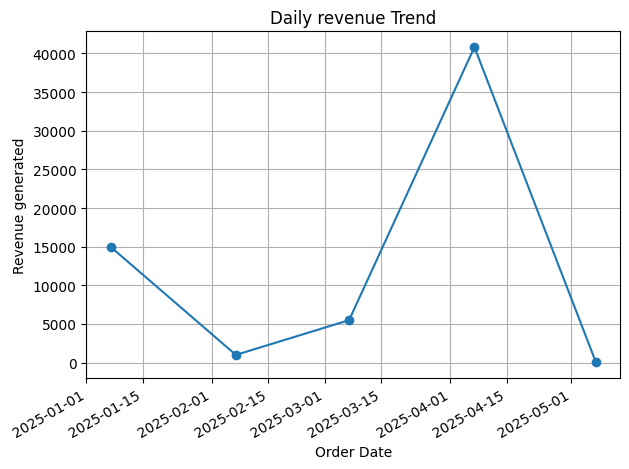

In [ ]:
import matplotlib.pyplot as plt

daily_sales.plot(kind='line', marker='o')
plt.title('Daily revenue Trend')
plt.xlabel('Order Date')
plt.ylabel('Revenue generated')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
top_products=df_1.groupby('Product_Category')['Total_value'].sum().sort_values(ascending=False)

In [ ]:
top_products_1=top_products.head(5)
top_products_1

Product_Category
Books            899.10
Clothing         999.50
Electronics    57401.25
Groceries       3100.00
Name: Total_value, dtype: float64

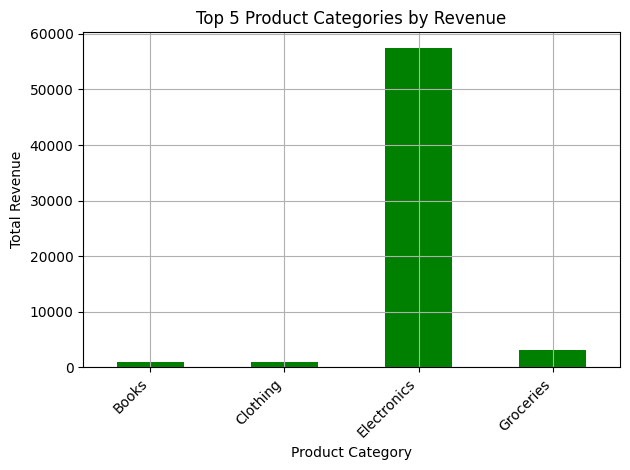

In [ ]:
top_products_1.plot(kind='bar', color='green')
plt.title('Top 5 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()